## Credits

https://www.kaggle.com/guanlintao

# Table of Contents
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Visualization](#3)
- [4. Split Dataset](#4)
- [5. Modeling](#5)  
- [6. Predict Test Data](#6)  
- [7. Loss & Accuracy](#7)  
- [8. Conclusion](#8)  

Simple Cats and Dogs Binary Classification Dataset


About Dataset
This dataset is a simple cat and dog binary classification dataset with 2 categories, where the training set contains 275 annotated images and the validation set contains 70 annotated images. The whole dataset is 10.3MB in total, which can be used for fast model validation, performance evaluation, small dataset training and so on.

<a id="1"></a>
# **<center><span style="color:#005dc4;">Import Libraries</span></center>**

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# **<center><span style="color:#005dc4;">Read Dataset</span></center>**

In [3]:
#Create Files_Name
image_data='/kaggle/input/cats-and-dogs/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,dog
1,classname.txt
2,cat


In [4]:
#Create Files_Name
image_test_data='/kaggle/input/cats-and-dogs/val'
pd.DataFrame(os.listdir(image_test_data),columns=['Files_Name'])

,Files_Name
0,dog
1,classname.txt
2,cat


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/cats-and-dogs/train/dog/havanese...,dog
1,/kaggle/input/cats-and-dogs/train/dog/leonberg...,dog
2,/kaggle/input/cats-and-dogs/train/cat/Sphynx_1...,cat
3,/kaggle/input/cats-and-dogs/train/dog/samoyed_...,dog
4,/kaggle/input/cats-and-dogs/train/dog/english_...,dog
...,...,...
270,/kaggle/input/cats-and-dogs/train/cat/Ragdoll_...,cat
271,/kaggle/input/cats-and-dogs/train/dog/wheaten_...,dog
272,/kaggle/input/cats-and-dogs/train/cat/Siamese_...,cat
273,/kaggle/input/cats-and-dogs/train/dog/american...,dog


In [6]:
files = [i for i in glob.glob(image_test_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
test_dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
test_dataframe

,Image,Label
0,/kaggle/input/cats-and-dogs/val/dog/miniature_...,dog
1,/kaggle/input/cats-and-dogs/val/cat/British_Sh...,cat
2,/kaggle/input/cats-and-dogs/val/dog/american_p...,dog
3,/kaggle/input/cats-and-dogs/val/cat/Bengal_141...,cat
4,/kaggle/input/cats-and-dogs/val/dog/boxer_12_j...,dog
...,...,...
65,/kaggle/input/cats-and-dogs/val/dog/pomeranian...,dog
66,/kaggle/input/cats-and-dogs/val/cat/Bombay_130...,cat
67,/kaggle/input/cats-and-dogs/val/cat/Siamese_15...,cat
68,/kaggle/input/cats-and-dogs/val/dog/beagle_133...,dog


<a id="3"></a>
# **<center><span style="color:#005dc4;">Visualization</span></center>**

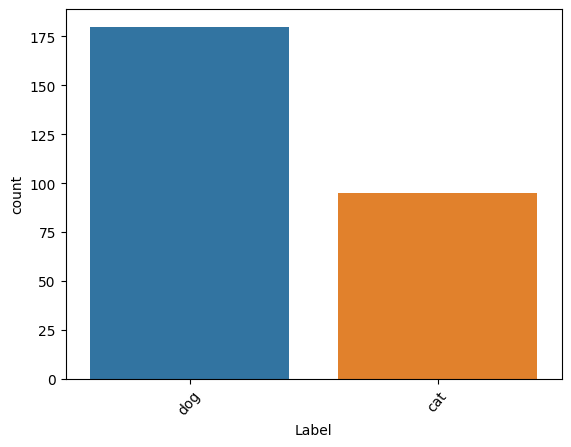

In [7]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

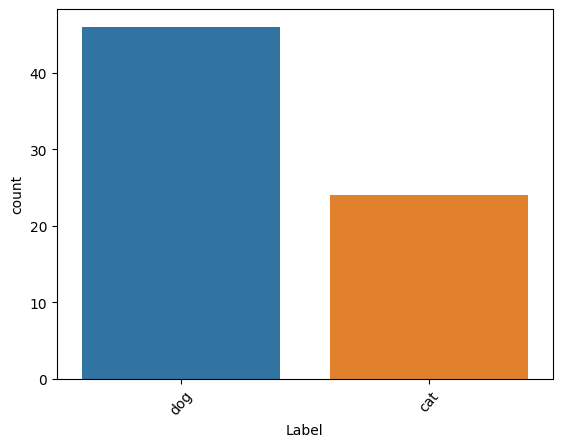

In [8]:
sns.countplot(x = test_dataframe["Label"])
plotter.xticks(rotation = 50);

<a id="4"></a>
# **<center><span style="color:#005dc4;">Split Dataset</span></center>**

In [9]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 275 files belonging to 2 classes.
Using 220 files for training.
Found 275 files belonging to 2 classes.
Using 55 files for validation.


In [10]:
class_names = train.class_names
class_names

['cat', 'dog']

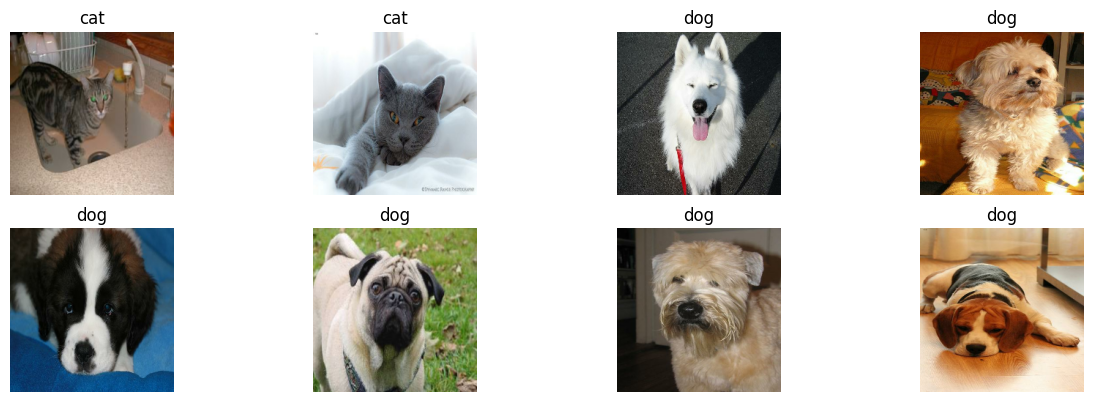

In [11]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<a id="5"></a>
# **<center><span style="color:#005dc4;">Modeling</span></center>**

In [12]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
keras_model.summary()

28456008/28456008 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Function  (None, 7, 7, 1280)       6931124   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 2)                 125442    
                                                                 
Total params: 7,056,566
Trainable params: 125,442
Non-trainable params: 6,931,124
_________________________________________________________________


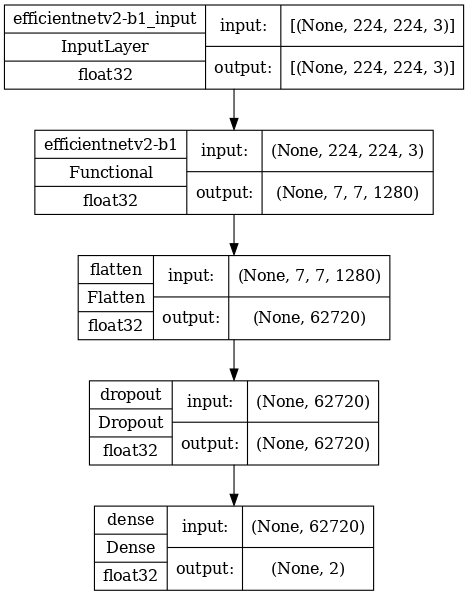

In [13]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [14]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [15]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [16]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=40,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/40
7/7 [==============================] - 28s 2s/step - loss: 0.2839 - accuracy: 0.8909 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/40
7/7 [==============================] - 12s 2s/step - loss: 0.0101 - accuracy: 0.9955 - val_loss: 6.5278e-05 - val_accuracy: 1.0000
Epoch 3/40
7/7 [==============================] - 11s 2s/step - loss: 3.8834e-04 - accuracy: 1.0000 - val_loss: 2.4621e-06 - val_accuracy: 1.0000
Epoch 4/40
7/7 [==============================] - 12s 2s/step - loss: 1.9240e-04 - accuracy: 1.0000 - val_loss: 4.0314e-07 - val_accuracy: 1.0000
Epoch 5/40
7/7 [==============================] - 12s 2s/step - loss: 1.0399e-04 - accuracy: 1.0000 - val_loss: 1.4305e-07 - val_accuracy: 1.0000
Epoch 6/40
7/7 [==============================] - 12s 2s/step - loss: 2.7324e-06 - accuracy: 1.0000 - val_loss: 7.5860e-08 - val_accuracy: 1.0000
Epoch 7/40
7/7 [==============================] - 11s 2s/step - loss: 0.0510 - accuracy: 0.9955 - val_loss: 1.2549e-06 - val_accuracy: 1

In [17]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.839140e-01,0.890909,2.836125e-03,1.0
1,1.011593e-02,0.995455,6.527800e-05,1.0
2,3.883404e-04,1.000000,2.462060e-06,1.0
3,1.924031e-04,1.000000,4.031401e-07,1.0
4,1.039941e-04,1.000000,1.430507e-07,1.0
5,2.732368e-06,1.000000,7.586033e-08,1.0
6,5.099329e-02,0.995455,1.254908e-06,1.0
7,1.815506e-05,1.000000,1.633505e-03,1.0
8,5.327664e-03,0.995455,1.206158e-04,1.0
9,3.545255e-04,1.000000,8.282217e-06,1.0


In [18]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 [==============================] - 2s 846ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss = 0.0
Test Accuracy = 1.0


In [19]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.839140e-01,0.890909,2.836125e-03,1.0
1,1.011593e-02,0.995455,6.527800e-05,1.0
2,3.883404e-04,1.000000,2.462060e-06,1.0
3,1.924031e-04,1.000000,4.031401e-07,1.0
4,1.039941e-04,1.000000,1.430507e-07,1.0
5,2.732368e-06,1.000000,7.586033e-08,1.0
6,5.099329e-02,0.995455,1.254908e-06,1.0
7,1.815506e-05,1.000000,1.633505e-03,1.0
8,5.327664e-03,0.995455,1.206158e-04,1.0
9,3.545255e-04,1.000000,8.282217e-06,1.0


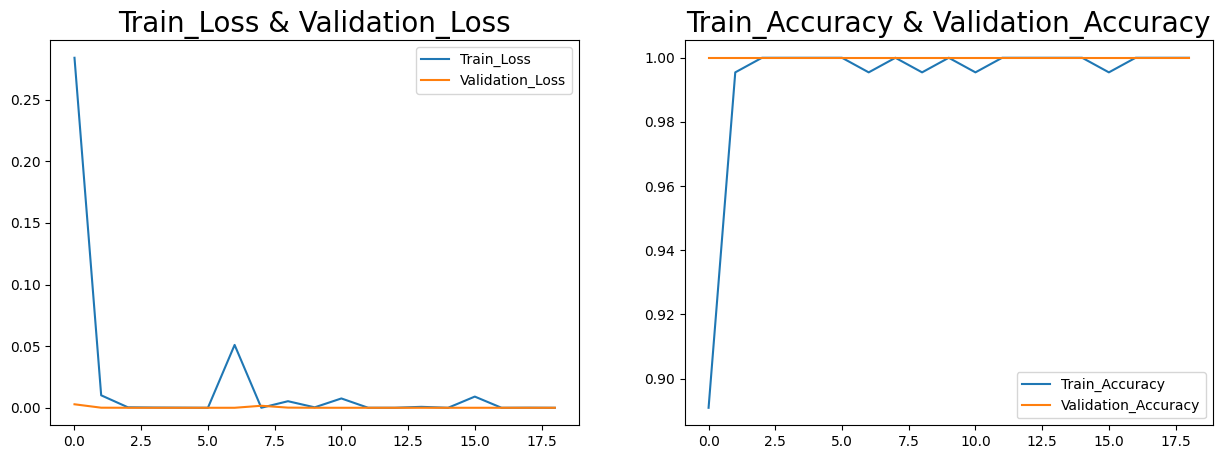

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

<a id="6"></a>
# **<center><span style="color:#005dc4;">Predict Test Data</span></center>**

In [21]:
test= tf.keras.preprocessing.image_dataset_from_directory(
    image_test_data,
    image_size=(224,224),
    validation_split=None,
)

Found 70 files belonging to 2 classes.


In [22]:
test_score, test_acc = keras_model.evaluate(test)
print('Test Loss =', test_score)
print('Test Accuracy =', test_acc)

3/3 [==============================] - 3s 770ms/step - loss: 0.0268 - accuracy: 0.9857
Test Loss = 0.026811888441443443
Test Accuracy = 0.9857142567634583


<a id="7"></a>
# **<center><span style="color:#005dc4;">Loss & Accuracy</span></center>**

In [23]:
Accuracy = [('valid', score, acc),
          ('test', test_score, test_acc)
         ]                                                 

predict_test = pd.DataFrame(data = Accuracy, columns=['Model', 'loss', 'accuracy'])
predict_test

,Model,loss,accuracy
0,valid,0.000000,1.000000
1,test,0.026812,0.985714


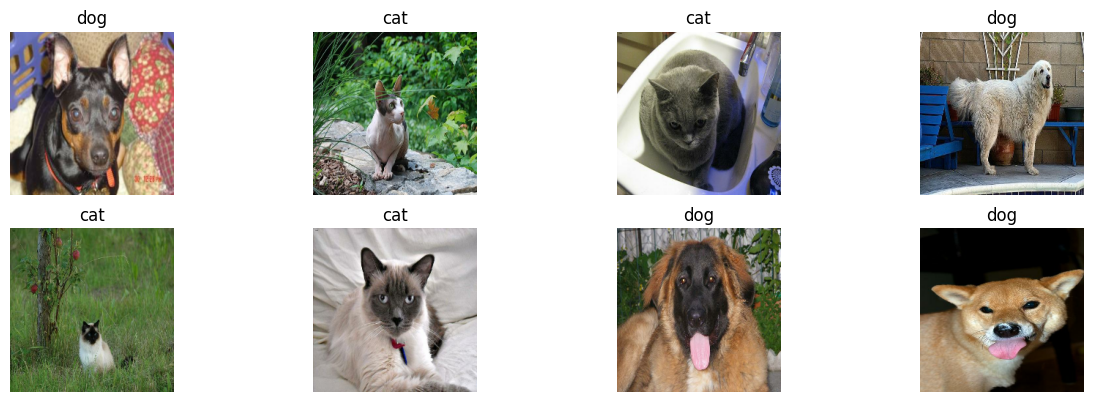

In [24]:
plt.figure(figsize=(15, 20))
for images, labels in test.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

tf.Tensor([1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)
1/1 [==============================] - 2s 2s/step
1


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

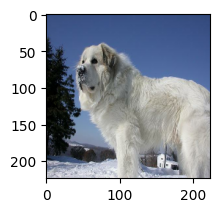

In [25]:
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Function to preprocess and predict labels for an image
def predict_labels(image):
    # Preprocess the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension if needed

    # Get the prediction
    predictions = keras_model.predict(image)
    predicted_label = np.argmax(predictions)

    return predicted_label



# Visualize 10 images with predicted labels in two rows
plt.figure(figsize=(15, 20))
for image, label in test.take(1):
    print(label)
    for i in range(10):
        axs = plt.subplot(8,4, i + 1)
        predicted_label = predict_labels(image[i])
        print(predicted_label)
        plt.imshow(image[i].numpy().astype("uint8"))
        if label == predicted_label:
            plt.title('true label: ' + class_names[label] + '\n' + 'predicted label: ' + class_names[predicted_label], fontsize = 8, color = 'green')
        else:
            plt.title('true label: ' + class_names[label] + '\n' + 'predicted label: ' + class_names[predicted_label], fontsize = 8, color = 'red')
        plt.axis("off")        
        
plt.show()
